In [108]:
import sympy
from sympy import init_printing, pprint, latex 
from sympy import binomial, Function, factorial, Symbol, symbols, Sum, S  
# S is for SingletonRegistry
from sympy import Rational as Rat
from sympy import Matrix, solve_linear_system

EY : 20160627 I have no idea what `sympy.SingletonRegistry` means despite the [documentation for SingletonRegistry](http://docs.sympy.org/0.7.1/_modules/sympy/core/singleton.html), which is sparse at best.  

In [30]:
init_printing() # LaTeX printing 

In [35]:
n = Symbol('n',integer=True,positive=True)
i = Symbol('i',integer=True,positive=True)
j = Symbol('j',integer=True,positive=True)
x,h,x_0 = symbols('x h x_0',real=True)
f = Function('f')

In [8]:
factorial(5)

120

In [18]:
C_n = Sum((-1)**i*binomial(n,i),(i,1,n))


In [24]:
(C_n.subs(n,3)).evalf()

-1.00000000000000

cf. From *stackexchange* [How to do a symbolic taylor expansion of an unknown function $f(x)$ using sympy](http://stackoverflow.com/questions/16869587/how-to-do-a-symbolic-taylor-expansion-of-an-unknown-function-fx-using-sympy)

In [78]:
f(x).series(x, x0=x_0, n=3)

                                                ⎛  2        ⎞│                
                                              2 ⎜ d         ⎟│                
                                      (x - x₀) ⋅⎜────(f(ξ₁))⎟│                
                                                ⎜   2       ⎟│                
                 ⎛ d        ⎞│                  ⎝dξ₁        ⎠│ξ₁=x₀    ⎛      
f(x₀) + (x - x₀)⋅⎜───(f(ξ₁))⎟│      + ───────────────────────────── + O⎝(x - x
                 ⎝dξ₁       ⎠│ξ₁=x₀                 2                         

            
            
            
            
  3        ⎞
₀) ; x → x₀⎠
            

In [32]:
pprint( f(x).series(x, x0=h, n=3) )

                                              ⎛  2        ⎞│                  
                                            2 ⎜ d         ⎟│                  
                                    (-h + x) ⋅⎜────(f(ξ₁))⎟│                  
                                              ⎜   2       ⎟│                  
                ⎛ d        ⎞│                 ⎝dξ₁        ⎠│ξ₁=h    ⎛        3
f(h) + (-h + x)⋅⎜───(f(ξ₁))⎟│     + ──────────────────────────── + O⎝(-h + x) 
                ⎝dξ₁       ⎠│ξ₁=h                2                            

        
        
        
        
       ⎞
; x → h⎠
        


In [33]:
latex(f(x).series(x, x0=h, n=3) )

'f{\\left (h \\right )} + \\left(- h + x\\right) \\left. \\frac{d}{d \\xi_{1}} f{\\left (\\xi_{1} \\right )} \\right|_{\\substack{ \\xi_{1}=h }} + \\frac{1}{2} \\left(- h + x\\right)^{2} \\left. \\frac{d^{2}}{d \\xi_{1}^{2}}  f{\\left (\\xi_{1} \\right )} \\right|_{\\substack{ \\xi_{1}=h }} + \\mathcal{O}\\left(\\left(- h + x\\right)^{3}; x\\rightarrowh\\right)'

In [37]:
FW = f(x+h).series(x+h, x0=x_0, n=3)
FW = FW.subs(x-x_0,0)

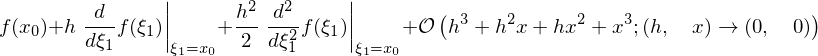

In [38]:
FW

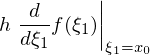

In [42]:
FW.args[0]

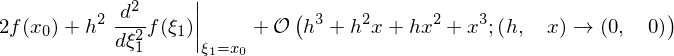

In [55]:
(f(x+h).series(x+h,x0=x_0,n=3)+f(x-h).series(x-h,x0=x_0,n=3)).subs(x-x_0,0)

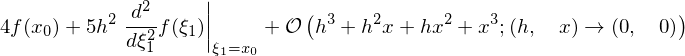

In [62]:
( f(x+h).series(x+h,x0=x_0,n=3) + f(x-h).series(x-h,x0=x_0,n=3) + \
f(x+2*h).series(x+2*h,x0=x_0,n=3) + f(x-2*h).series(x-2*h,x0=x_0,n=3) ).subs(x-x_0,0)

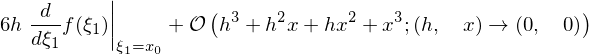

In [63]:
( f(x+h).series(x+h,x0=x_0,n=3) - f(x-h).series(x-h,x0=x_0,n=3) + \
f(x+2*h).series(x+2*h,x0=x_0,n=3) - f(x-2*h).series(x-2*h,x0=x_0,n=3) ).subs(x-x_0,0)

finite-difference for the 1st order derivative ($n=1$), to the $p$th-order, $p=8$

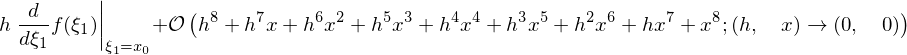

In [77]:
p = 8
( Rat(4,5)*(f(x+h).series(x+h,x0=x_0,n=p) - f(x-h).series(x-h,x0=x_0,n=p)) + \
Rat(-1,5)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)-f(x-2*h).series(x-2*h,x0=x_0,n=p)) + \
Rat(4,105)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)-f(x-3*h).series(x-3*h,x0=x_0,n=p)) + \
Rat(-1,280)*(f(x+4*h).series(x+4*h,x0=x_0,n=p)-f(x-4*h).series(x-4*h,x0=x_0,n=p)) ).subs(x-x_0,0)

In [74]:
Rat(4,5)

### *centered difference approximation*   
  
$$-i_{\text{min}} = (d+p-1)/2 $$  
$$i_{\text{max}} = \lceil (d+p-1)/2 \rceil $$

cf. [Derivative Approximation by Finite Differences
David Eberly](http://math.nyu.edu/~atm262/fall06/compmethods/a1/DerivativesApproximationByFiniteDifferences.pdf)  

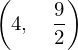

In [88]:
d = 2 
p = 8
sympy.floor(Rat(d+p-1,2)), Rat((d+p-1),2)

First order derivatives $d=1$; let's aim for $-i_{\text{min}} = i_{\text{max}} = 2$ so we only need 2 neighbor values.

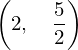

In [104]:
d = 1 
p = 5
sympy.floor(Rat(d+p-1,2)), Rat((d+p-1),2)

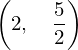

In [106]:
d = 2 
p = 4
sympy.floor(Rat(d+p-1,2)), Rat((d+p-1),2)

In [147]:
C_1,C_2,C_3,C_4 = symbols('C_1 C_2 C_3 C_4', integer=True)

From `sympy` documentation, [Matrices (linear algebra), Basic Manipulation](http://docs.sympy.org/0.7.2/modules/matrices/matrices.html), I learned to construct matrices with the `lambda` function

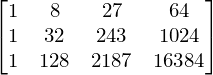

In [117]:
Matrix(3,4, lambda i,j: (j+1)**(2*(i+1)+1))

In [116]:
Matrix(1,4,lambda i,j: 2*(j+1))

In [138]:
C_nu_d1p6 = sympy.zeros(4,5) # d = 1, p = 6
C_nu_d1p6[:3,:4] = Matrix(3,4,lambda i,j: (j+1)**(2*(i+1)+1))
C_nu_d1p6[3,:4] = Matrix(1,4,lambda i,j: 2*(j+1))
C_nu_d1p6[3,4] = Rat(1)

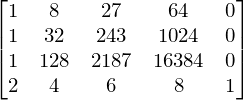

In [139]:
C_nu_d1p6

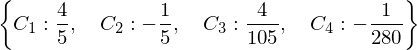

In [148]:
solve_linear_system( C_nu_d1p6, C_1,C_2,C_3,C_4 )

Also, another way is this:

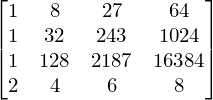

In [142]:
C_nuM_d1p6 = sympy.zeros(4,4) # d = 1, p = 6
C_nuM_d1p6[:3,:4] = Matrix(3,4,lambda i,j: (j+1)**(2*(i+1)+1))
C_nuM_d1p6[3,:4] = Matrix(1,4,lambda i,j: 2*(j+1))
C_nuM_d1p6

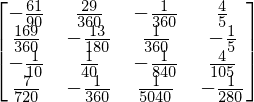

In [144]:
C_nuM_d1p6.inv() # and then read off the last column

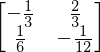

In [146]:
Matrix([[1,8],[2,4]]).inv() # d = 1, p=2

In [153]:
C_nu_d1p4 = sympy.zeros(3,4) # d = 1, p = 4
C_nu_d1p4[:2,:3] = Matrix(2,3,lambda i,j: (j+1)**(2*(i+1)+1))
C_nu_d1p4[2,:3] = Matrix(1,3,lambda i,j: 2*(j+1))
C_nu_d1p4[2,3] = Rat(1)

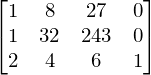

In [150]:
C_nu_d1p4

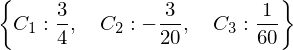

In [155]:
solve_linear_system( C_nu_d1p4, C_1,C_2,C_3 )

Indeed, 

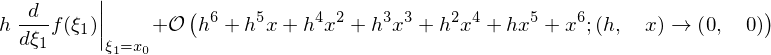

In [156]:
p = 6
( Rat(3,4)*(f(x+h).series(x+h,x0=x_0,n=p) - f(x-h).series(x-h,x0=x_0,n=p)) + \
Rat(-3,20)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)-f(x-2*h).series(x-2*h,x0=x_0,n=p)) + \
Rat(1,60)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)-f(x-3*h).series(x-3*h,x0=x_0,n=p))).subs(x-x_0,0)

#### For $d=2$

In [164]:
C_nu_d2p4 = sympy.zeros(2,3) # d = 2, p = 4
C_nu_d2p4[:1,:2] = Matrix(1,2,lambda i,j: (j+1)**(2*(i+2)))
C_nu_d2p4[1,:2] = Matrix(1,2,lambda i,j: 2*(j+1)**2)
C_nu_d2p4[1,2] = Rat(1)

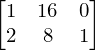

In [165]:
C_nu_d2p4

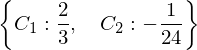

In [166]:
solve_linear_system( C_nu_d2p4, C_1,C_2)

In [168]:
C_nu_d2p6 = sympy.zeros(3,4) # d = 2, p = 6
C_nu_d2p6[:2,:3] = Matrix(2,3,lambda i,j: (j+1)**(2*(i+2)))
C_nu_d2p6[2,:3] = Matrix(1,3,lambda i,j: 2*(j+1)**2)
C_nu_d2p6[2,3] = Rat(1)

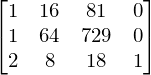

In [169]:
C_nu_d2p6

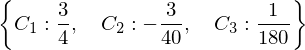

In [170]:
solve_linear_system( C_nu_d2p6, C_1,C_2,C_3)

Indeed, 

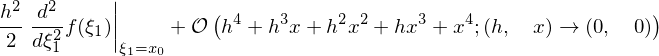

In [172]:
p = 4
( Rat(2,3)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(-1,24)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p) -2*f(x_0))).subs(x-x_0,0)

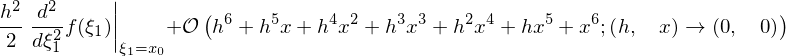

In [175]:
p = 6
( Rat(3,4)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p)-2*f(x_0)) + \
Rat(-3,40)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p)-2*f(x_0)) + \
Rat(1,180)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)+f(x-3*h).series(x-3*h,x0=x_0,n=p)-2*f(x_0))).subs(x-x_0,0)